In [9]:
import helper
import pathlib
import importlib
import numpy as np
import seaborn as sns
from nilearn.image import load_img, iter_img, index_img, concat_imgs, new_img_like

In [2]:
Original_DBMs = load_img("/data/origami/niusha/input/DBM_data.nii")
data = Original_DBMs.get_fdata()

In [26]:
importlib.reload(helper)

<module 'helper' from '/data/origami/niusha/code/local-experiment/helper.py'>

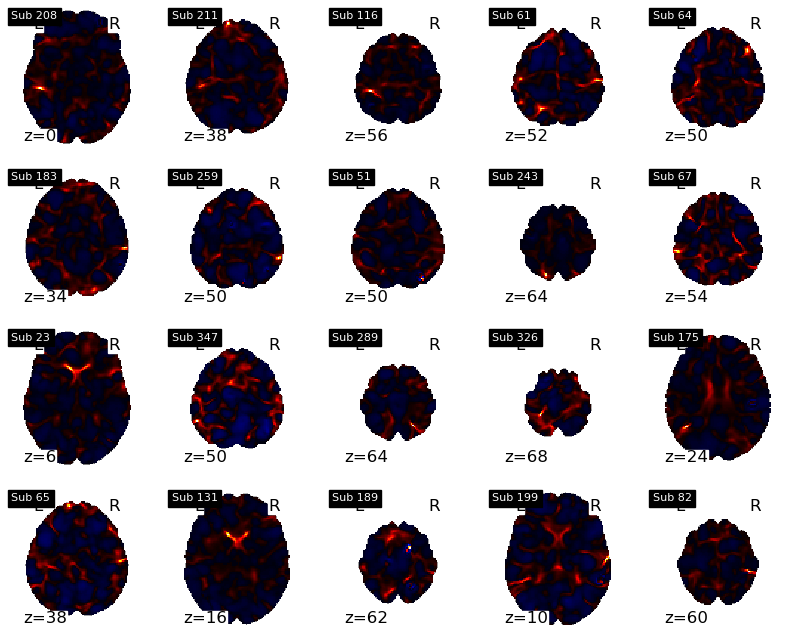

In [4]:
helper.random_plotter(Original_DBMs)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 30.3909
Overall Minimum: -0.0007
Overall Mean: -11.3931
Overall Variance: 0.0330


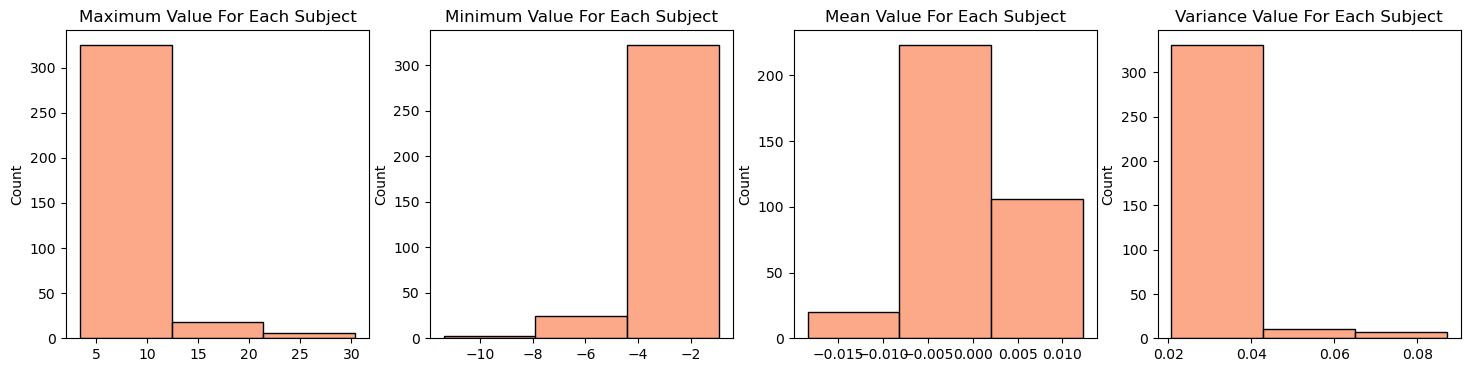

In [27]:
helper.image_report(Original_DBMs)

In [25]:
# from nilearn.maskers import NiftiMasker
# nifti_masker = NiftiMasker(standardize=True,
#                            target_affine=Original_DBMs.affine,
#                            )

# Original_DBMs_masked_data = nifti_masker.fit_transform(Original_DBMs)                             
# Original_DBMs_masked = new_img_like(ref_niimg=Original_DBMs, data=Original_DBMs_masked_data, copy_header=True)     

In [7]:
ICs_whole_original = load_img("/data/origami/niusha/code/local-experiment/io/whole_original_data/ICAs/ICAs_whole_original.nii.gz")

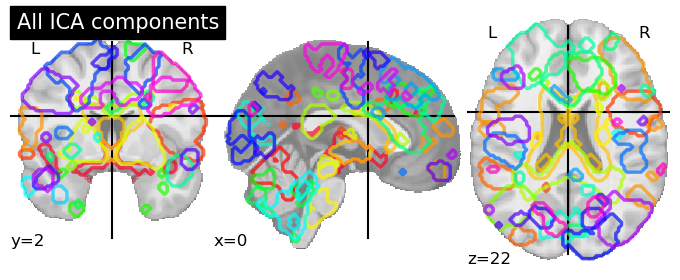

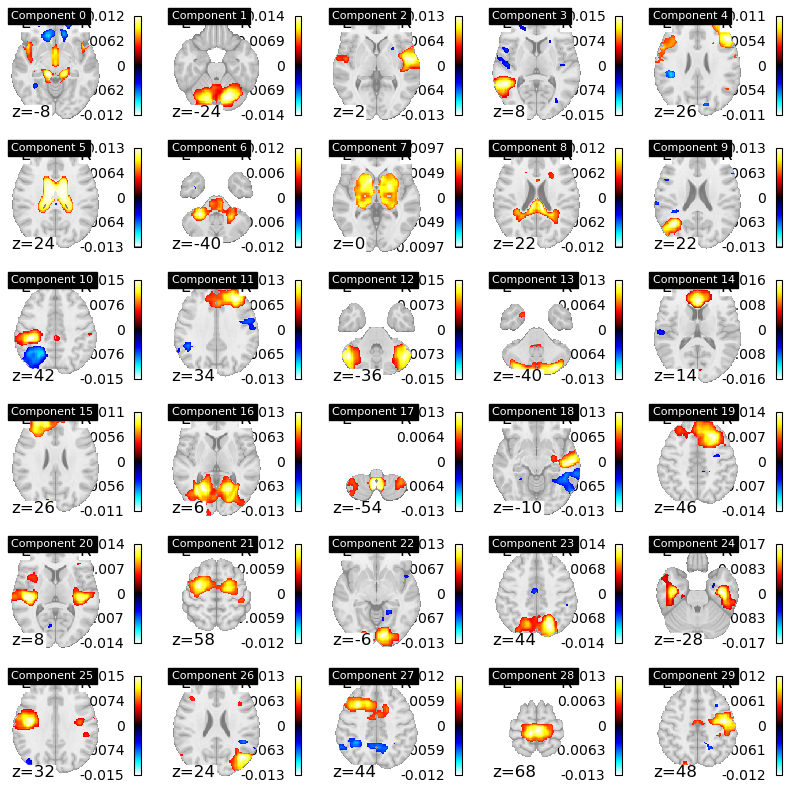

In [7]:
helper.plot_ICA_components(imgs=ICs_whole_original)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 0.0167
Overall Minimum: 0.0000
Overall Mean: -0.0117
Overall Variance: 0.0000


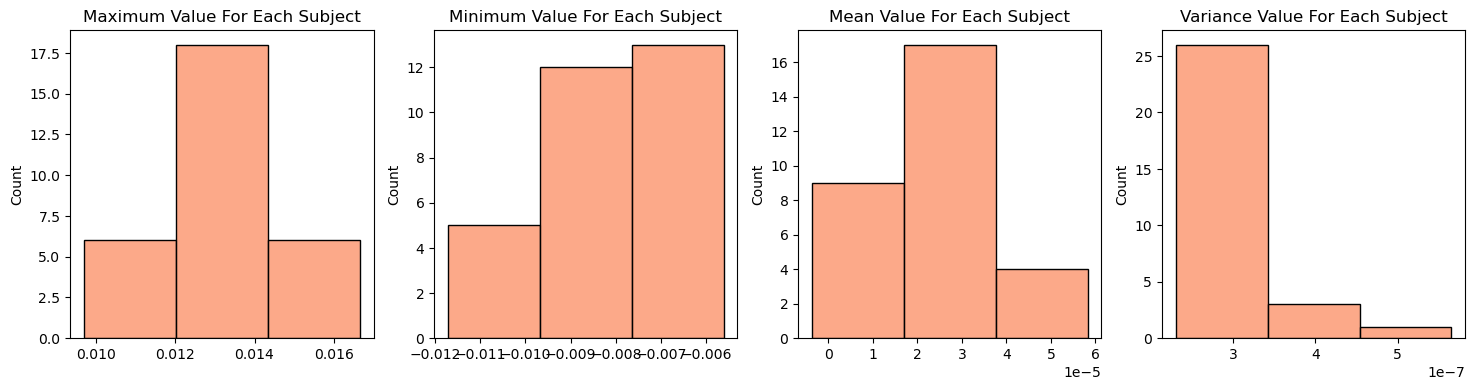

In [29]:
helper.image_report(ICs_whole_original)

In [10]:
List_of_masks = []
path = pathlib.Path("/data/origami/niusha/code/local-experiment/io/whole_original_data/PD/masks/")
for i in range(30):
    List_of_masks.append(load_img(path / f"IC_PD_{i}.nii.gz"))

masks = concat_imgs(List_of_masks)

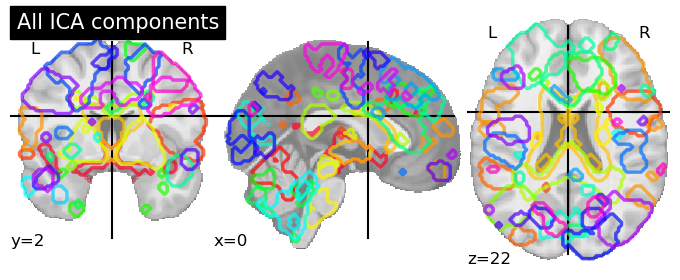

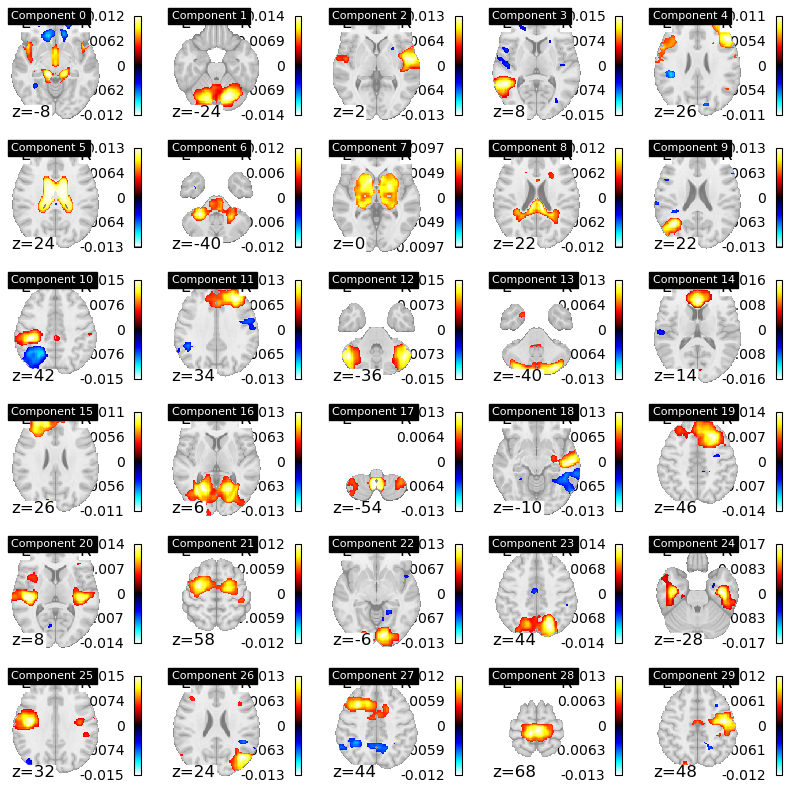

In [10]:
helper.plot_ICA_components(masks)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 0.0167
Overall Minimum: 0.0000
Overall Mean: 0.0000
Overall Variance: 0.0000


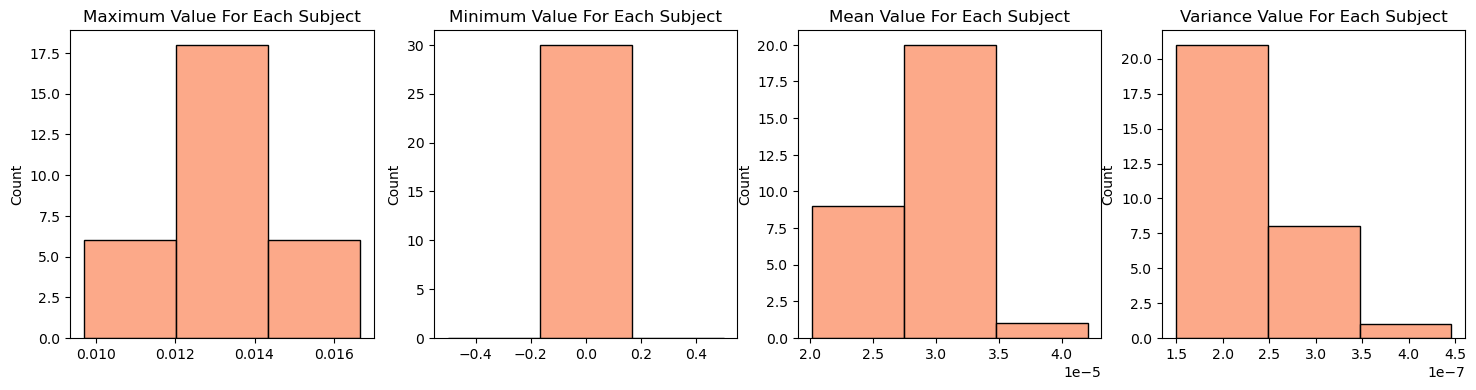

In [30]:
helper.image_report(masks)

In [12]:
from nilearn.image import iter_img, threshold_img

In [13]:
ICs_data = ICs_whole_original.get_fdata()

In [14]:
thr_IC_data = np.zeros((ICs_whole_original.shape))

In [15]:
test = []
for img in iter_img(ICs_whole_original):
    test.append(threshold_img(img=img, threshold="90%", two_sided=False))

In [16]:
masks_thr = concat_imgs(test) 

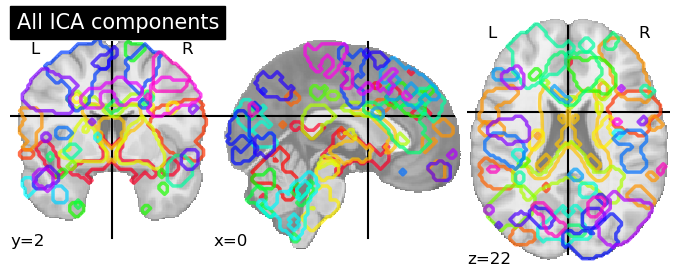

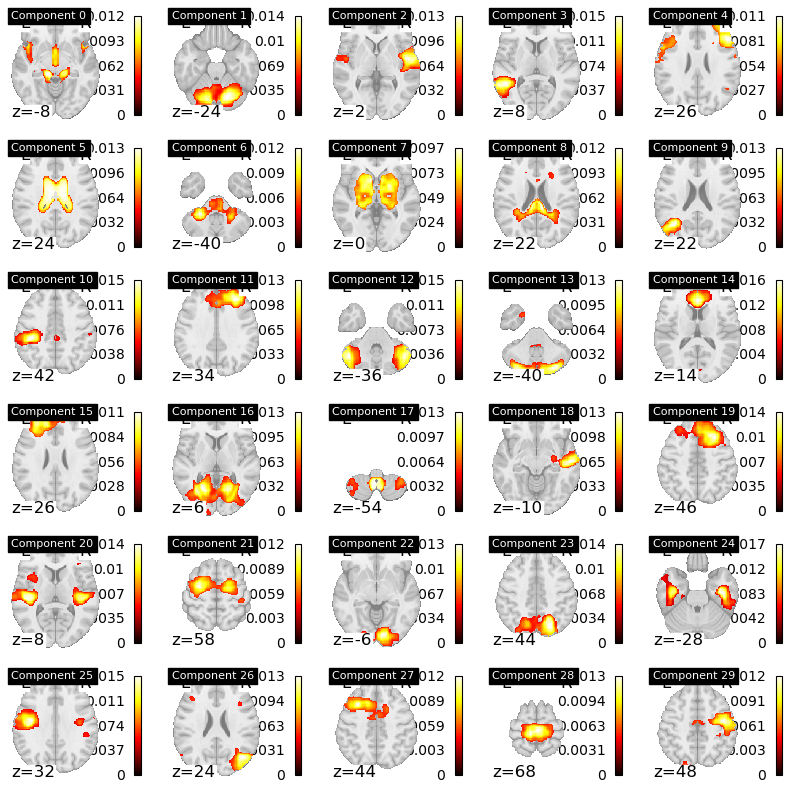

In [36]:
helper.plot_ICA_components(masks_thr)

     ======== General Information ========
Overall Maximum: 0.02
Overall Minimum: 0.00
Overall Mean: 0.00
Overall Variance: 0.00


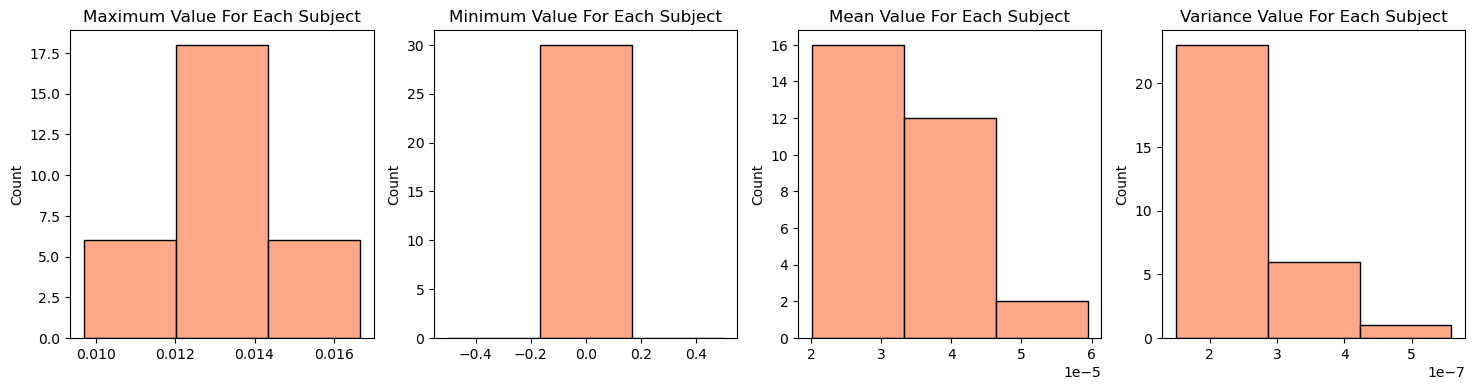

In [17]:
helper.image_report(masks_thr)